  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64
Explained variance by each component: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]
Cumulative explained variance: [0.3  0.49 0.63 0.71 0.77 0.82 0.86 0.9  0.94 0.97 1.  ]


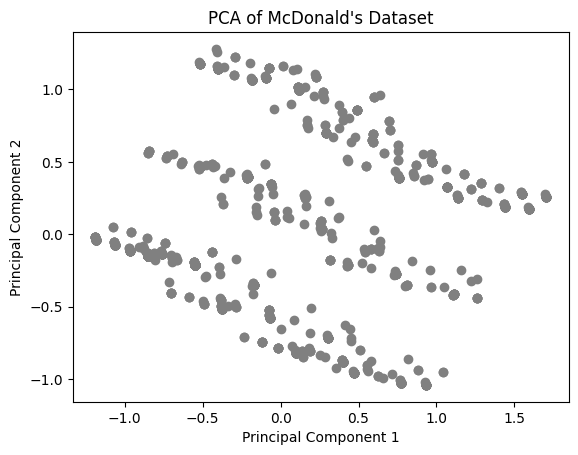

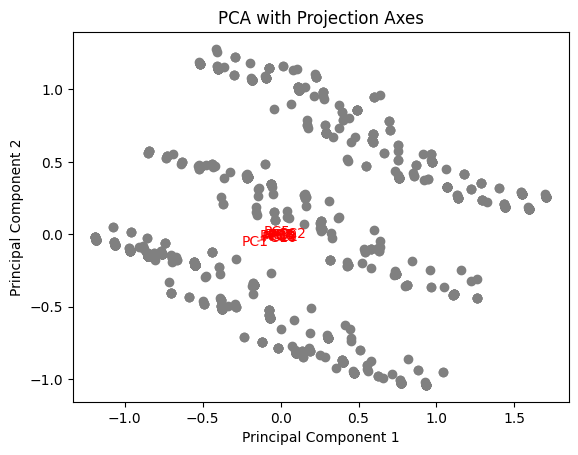

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best KMeans model has 8 clusters with inertia 1163.9313763135297
Cluster labels: [1 4 4 ... 0 6 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

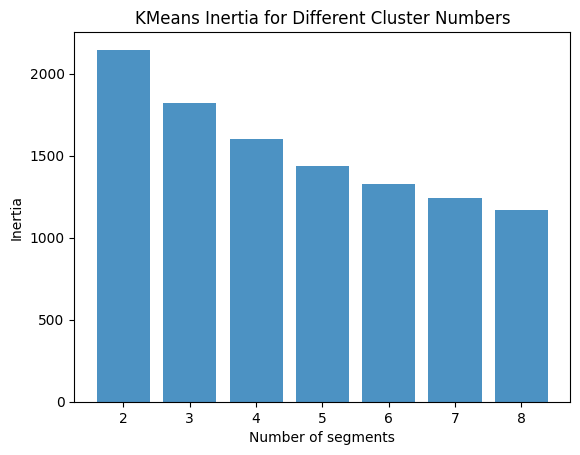

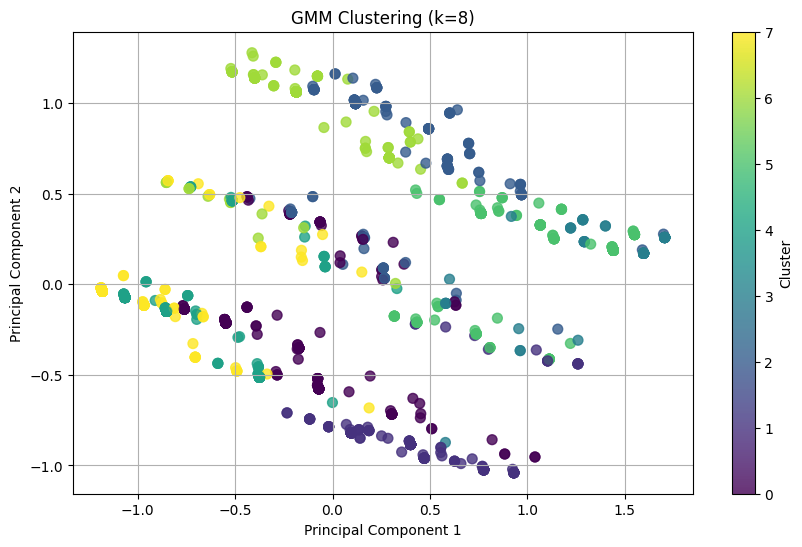

Best GMM model with k=8 has BIC score: -53943.37930947363


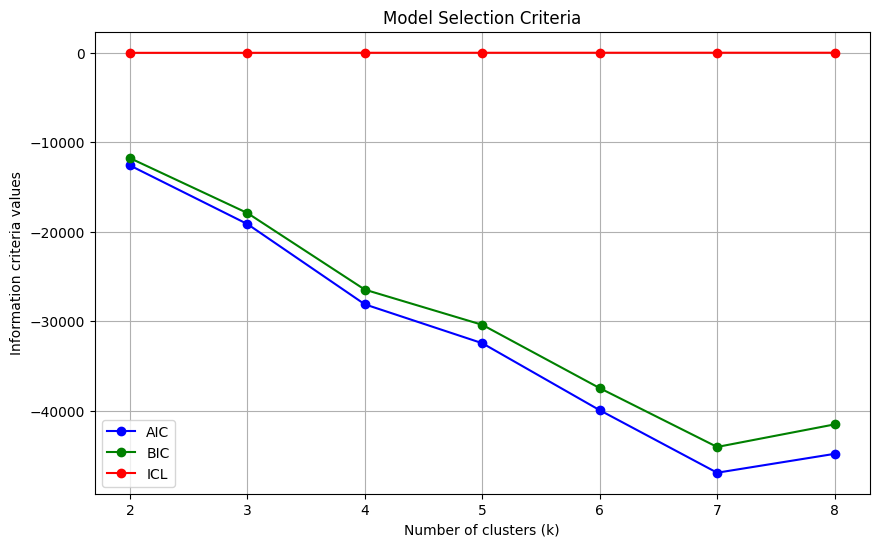

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Contingency Table (KMeans vs GMM):
GMM       0    1    2    3
KMeans                    
0       191    0  389    0
1        69  249   10    0
2        60    0    2  253
3         3   83    2  142
Log-likelihood (KMeans + GMM): 5.836
Log-likelihood (GMM): 5.836
Reversed Table of Like:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64
Table of Like.n:
Like.n
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: count, dtype: int64


PatsyError: Error evaluating factor: NameError: name 'Like_n' is not defined
    Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
    ^^^^^^

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt
from collections import defaultdict
from patsy import dmatrices

# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")
print(mcdonalds.head(3))

# Transform Yes/No to 1/0 for PCA
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)
column_means = np.round(np.mean(MD_x, axis=0), 2)
print(column_means)

# Apply PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_variance = np.round(pca.explained_variance_ratio_, 2)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 2)
print("Explained variance by each component:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)

# Plot PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Dataset')
plt.show()

# Plotting projection axes
def plot_proj_axes(pca, ax):
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
        ax.arrow(0, 0, comp[0] * var, comp[1] * var, color='r', alpha=0.5)
        ax.text(comp[0] * var * 1.15, comp[1] * var * 1.15, f'PC{i+1}', color='r', ha='center', va='center')

fig, ax = plt.subplots()
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plot_proj_axes(pca, ax)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Projection Axes')
plt.show()

# KMeans clustering
np.random.seed(1234)
best_kmeans = None
best_inertia = np.inf

for k in range(2, 9):
    for _ in range(10):
        kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
        kmeans.fit(MD_x)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans

labels = best_kmeans.labels_
print(f"Best KMeans model has {best_kmeans.n_clusters} clusters with inertia {best_inertia}")
print(f"Cluster labels: {labels}")

# Inertia values for different cluster sizes
inertia_values = []
for k in range(2, 9):
    best_local_inertia = np.inf
    for _ in range(10):
        kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
        kmeans.fit(MD_x)
        if kmeans.inertia_ < best_local_inertia:
            best_local_inertia = kmeans.inertia_
    inertia_values.append(best_local_inertia)

plt.bar(range(2, 9), inertia_values, alpha=0.8)
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.title('KMeans Inertia for Different Cluster Numbers')
plt.show()

# Gaussian Mixture Model (GMM) clustering
k_range = range(2, 9)
n_repeats = 10
models = {}

for k in k_range:
    bic_scores = []
    for _ in range(n_repeats):
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=np.random.randint(10000))
        gmm.fit(MD_x)
        bic_scores.append(gmm.bic(MD_x))
    models[k] = (gmm, np.min(bic_scores))

best_k = min(models, key=lambda k: models[k][1])
best_gmm, best_bic = models[best_k]
MD_labels = best_gmm.predict(MD_x)

plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_labels, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'GMM Clustering (k={best_k})')
plt.grid(True)
plt.show()

print(f"Best GMM model with k={best_k} has BIC score: {best_bic}")

# Information criteria comparison for GMM
aic_values = []
bic_values = []
icl_values = []

for k in k_range:
    aic_scores = []
    bic_scores = []
    icl_scores = []
    for _ in range(n_repeats):
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=np.random.randint(10000))
        gmm.fit(MD_x)
        aic_scores.append(gmm.aic(MD_x))
        bic_scores.append(gmm.bic(MD_x))
        icl_scores.append(gmm.lower_bound_)

    aic_values.append(np.mean(aic_scores))
    bic_values.append(np.mean(bic_scores))
    icl_values.append(np.mean(icl_scores))

plt.figure(figsize=(10, 6))
plt.plot(k_range, aic_values, marker='o', linestyle='-', color='b', label='AIC')
plt.plot(k_range, bic_values, marker='o', linestyle='-', color='g', label='BIC')
plt.plot(k_range, icl_values, marker='o', linestyle='-', color='r', label='ICL')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Information criteria values')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True)
plt.show()

# Contingency table for KMeans and GMM clusters
kmeans = KMeans(n_clusters=4, random_state=np.random.randint(10000))
MD_k4 = kmeans.fit_predict(MD_x)

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=np.random.randint(10000))
MD_m4a = gmm.fit(MD_x)
MD_m4a_clusters = MD_m4a.predict(MD_x)

contingency_table = pd.crosstab(index=MD_k4, columns=MD_m4a_clusters, rownames=['KMeans'], colnames=['GMM'])
print("Contingency Table (KMeans vs GMM):")
print(contingency_table)

# Log-likelihood comparison
log_likelihood_kmeans = gmm.score(MD_x)
log_likelihood_gmm = MD_m4a.score(MD_x)
print(f"Log-likelihood (KMeans + GMM): {log_likelihood_kmeans:.3f}")
print(f"Log-likelihood (GMM): {log_likelihood_gmm:.3f}")

# Like column transformation
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print("Reversed Table of Like:")
print(like_counts)

mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')
mcdonalds['Like.n'] = 6 - mcdonalds['Like']
like_n_table = mcdonalds['Like.n'].value_counts().sort_index()
print("Table of Like.n:")
print(like_n_table)

# Regression formula preparation
formula_str = "Like_n ~ " + " + ".join(mcdonalds.columns[:11])
y, X = dmatrices(formula_str, data=mcdonalds, return_type='dataframe')
print("Formula object (Design Matrix X):")
print(X.design_info)
